# Maîtriser la Régression : Des Bases Simples aux Techniques Puissantes
---

# Introduction

Ce notebook a pour objectif d’explorer en profondeur les **algorithmes de régression**, en suivant une progression allant des techniques les plus **simples et classiques** jusqu’aux approches **avancées et automatisées** utilisées en data science moderne.

Chaque algorithme sera présenté avec :
- une **explication claire de son fonctionnement**,
- ses **avantages** et **inconvénients**,
- ainsi que des **cas d’usage typiques**.

L’ambition de ce travail est double :
- ✅ **Montrer une bonne maîtrise des outils de modélisation supervisée** ainsi que des **étapes du pipeline de traitement des données** (prétraitement, sélection des variables, évaluation, tuning, etc.) ;
- 📘 **Servir de ressource synthétique et structurée** pour les personnes souhaitant **apprendre ou renforcer leurs connaissances** en régression, avec une approche à la fois **théorique et pratique**.

---

## Algorithmes abordés


Les modèles étudiés dans ce notebook incluent :

### Régressions classiques
- **Régression Linéaire** (`LinearRegression`)
- **Ridge Regression** (`Ridge`)
- **Lasso Regression** (`Lasso`)

### Arbres de décision et forêts
- **Decision Tree Regressor** (`DecisionTreeRegressor`)
- **Random Forest Regressor** (`RandomForestRegressor`)

### Méthodes à noyau
- **Support Vector Regressor** (`SVR`)

### Réseaux de neurones
- **Multi-layer Perceptron Regressor** (`MLPRegressor`)

### Méthodes de gradient boosting
- **XGBoost Regressor** (`XGBRegressor`)
- **LightGBM Regressor** (`LGBMRegressor`)
- **CatBoost Regressor** (`CatBoostRegressor`)
- **Gradient Boosting Regressor (sklearn)** (`GradientBoostingRegressor`)

### AutoML
- **AutoGluon Tabular Predictor** (AutoML pour la régression)

#### Détection d'anomalies ou d'outliers (prétraitement)
- **Isolation Forest** (`IsolationForest`)


---

Chacune de ces méthodes sera illustrée avec :
- notre **jeu de données adapté**,
- une **comparaison des performances** (MSE, R², etc.),
- et une **interprétation des résultats**.

Ce notebook peut ainsi servir de **référence pédagogique** ou de **base pratique** pour tout projet de régression supervisée.  





---
## 🏡 Présentation du Dataset : House Prices (Kaggle)

Le dataset **House Prices - Advanced Regression Techniques** est un jeu de données bien connu utilisé pour des tâches de **régression supervisée**. Il contient des **informations détaillées sur des maisons résidentielles** situées à Ames, Iowa (USA), et l'objectif est de **prédire le prix de vente final** à partir de ces caractéristiques.

---

### 🎯 Objectif du projet

> Prédire avec précision le **prix de vente** (`SalePrice`) d'une maison à partir de **plus de 70 variables explicatives** décrivant ses caractéristiques physiques, structurelles, géographiques et temporelles.

---

### 📦 Description des données

- **Nombre d’observations** : 1 460 lignes (maison vendues)
- **Nombre de variables** : 81 colonnes  
- **Variable cible** : `SalePrice` (prix de vente en dollars)

---

### 🗂️ Exemples de variables présentes

| Colonne           | Description                                    | Type       |
|-------------------|------------------------------------------------|------------|
| `LotArea`         | Surface du terrain                             | Numérique  |
| `OverallQual`     | Qualité globale du matériau et de la finition  | Ordinale   |
| `YearBuilt`       | Année de construction                          | Numérique  |
| `Neighborhood`    | Quartier                                       | Catégorie  |
| `GarageCars`      | Nombre de places de garage                     | Numérique  |
| `TotalBsmtSF`     | Surface totale du sous-sol (en pieds²)         | Numérique  |
| `GrLivArea`       | Surface habitable au-dessus du sol             | Numérique  |
| `FullBath`        | Nombre de salles de bain complètes             | Numérique  |
| `SalePrice`       | **Prix de vente (cible)**                      | Numérique  |

---

### 🧭 Intérêts pédagogiques du dataset

- Grand nombre de variables **mixtes** (numériques, catégorielles, ordinales)
- Problème réel de **régression complexe**
- Présence de **valeurs manquantes**, outliers et corrélations
- Très bon terrain pour explorer :  
  → EDA • Feature Engineering • Sélection de variables • Modélisation avancée

---

### 📌 Source

- Kaggle : [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



# Installation et Importation des packages

In [1]:
# !pip install catboost
# !pip install autogluon

In [ ]:
# === Standard Library ===
import warnings
warnings.filterwarnings("ignore")

# === Data manipulation & visualization ===
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Scikit-learn ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error,
    root_mean_squared_error,
    root_mean_squared_log_error,
)
from sklearn.linear_model import (
    LinearRegression,
    RidgeCV,
    LassoCV,
    ElasticNetCV,
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import (
    IsolationForest,
    RandomForestRegressor,
    GradientBoostingRegressor,
)

# === XGBoost ===
from xgboost import XGBRegressor, DMatrix, cv, plot_importance

# === LightGBM ===
import lightgbm as lgb

# === CatBoost ===
from catboost import CatBoostRegressor

# === AutoML ===
from autogluon.tabular import TabularPredictor


## Fonctions utilitaires

In [3]:
def plot_correlation_matrix(data):
    plt.figure(figsize=(18, 18))
    corr = data.corr().round(1).abs()
    sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()

def plot_missing_data(data):    
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()

def plot_feature_distribution(data, feature):
    if feature not in data.columns:
        print(f"Feature '{feature}' not found in dataset.")
        return
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

def plot_boxplot(data, feature):
    if feature not in data.columns:
        print(f"Feature '{feature}' not found in dataset.")
        return
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

def plot_scatter(data, x_feature, y_feature):
    if x_feature not in data.columns or y_feature not in data.columns:
        print(f"Feature '{x_feature}' or '{y_feature}' not found.")
        return
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[x_feature], y=data[y_feature])
    plt.title(f'{y_feature} vs {x_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.show()

def plot_pairplot(data, features):
    missing = [f for f in features if f not in data.columns]
    if missing:
        print(f"Missing features: {missing}")
        return
    sns.pairplot(data[features])
    plt.suptitle('Pairplot of Selected Features', y=1.02)
    plt.show()

def print_metrics(y_test, y_pred):
    print("Model Performance Metrics")
    print(f"MAE   : {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE  : {root_mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSLE : {root_mean_squared_log_error(y_test, y_pred):.4f}")
    print(f"MAPE  : {mean_absolute_percentage_error(y_test, y_pred):.4f}")
    print(f"R²    : {r2_score(y_test, y_pred):.4f}")

def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')  
    plt.title('Actual vs Predicted Values')
    plt.grid(True)
    plt.show()

def plot_feature_importances(importances, X_train, max_num_features=20):
    plt.figure(figsize=(12, 8))
    features = pd.Series(importances, index=X_train.columns)
    features.sort_values(ascending=False).head(max_num_features).plot(kind='bar')
    plt.title('Feature Importances')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()


# Chargement et Analyse Exploration des données (EDA)

In [4]:
data_train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv",index_col="Id")
data_test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv", index_col="Id")

In [5]:
data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt 

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [8]:
data_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
(data_train.isnull().sum()/data_train.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
MSSubClass      0.000000
dtype: float64

Toutes les variables sont categorique sauf MasVnrArea, GarageYrBlt et LotFrontage   
Les Nan des variables categoriques montrent la non présence de ce type donc pour le traiter on va creer une categorique "No present"
En ce qui concerne MasVnrArea , vu que le pourcentage est juste a 0.005479 de valeur Nan, on va le remplacer par la median.
Je préfere retirer GarageYrBlt car

In [10]:
data_train["MasVnrArea"].mean(), data_train["MasVnrArea"].median()

(103.68526170798899, 0.0)

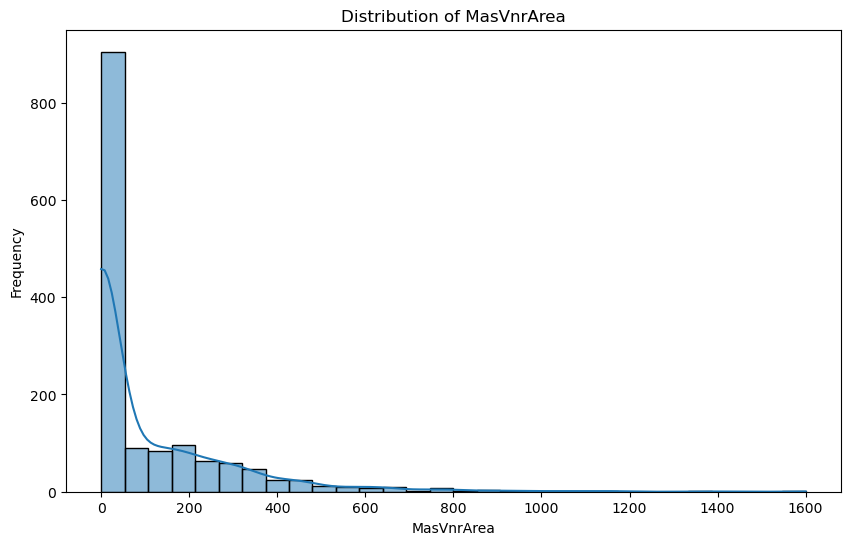

In [11]:
plot_feature_distribution(data_train, "MasVnrArea")

In [12]:
plot_feature_distribution(data_train, "HouseAgeRemodAtSale")

Feature 'HouseAgeRemodAtSale' not found in dataset.


LotFontage médian :69.0, LotFontage moyen: 70.04995836802665


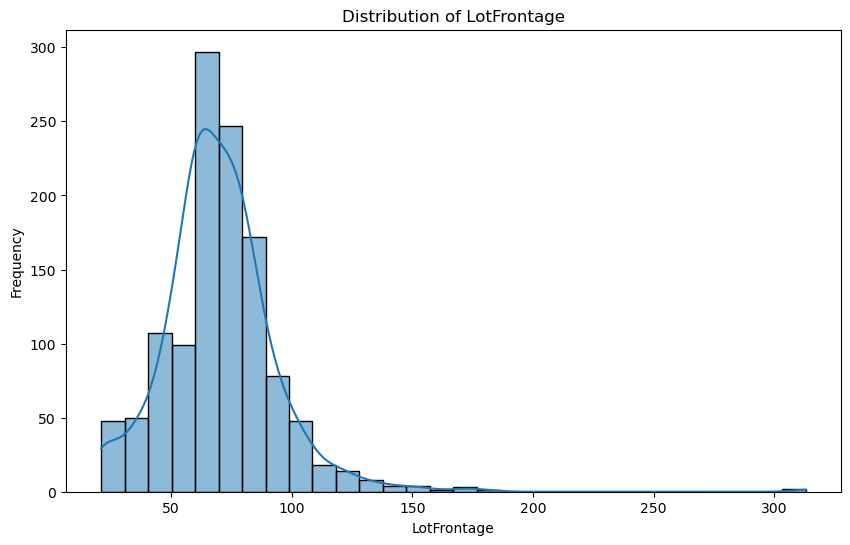

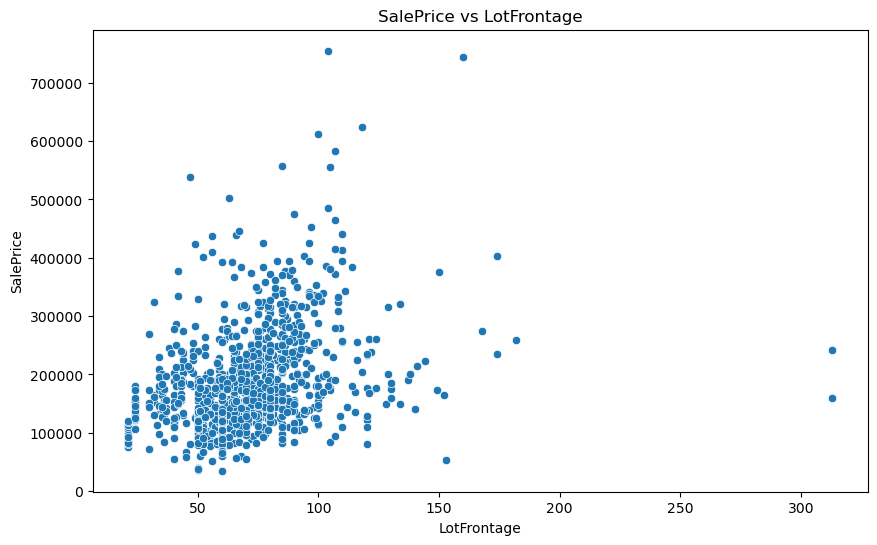

In [13]:
print(f"LotFontage médian :{data_train['LotFrontage'].median()}, LotFontage moyen: {data_train['LotFrontage'].mean()}")
plot_feature_distribution(data_train, 'LotFrontage')
plot_scatter(data_train, "LotFrontage", "SalePrice")

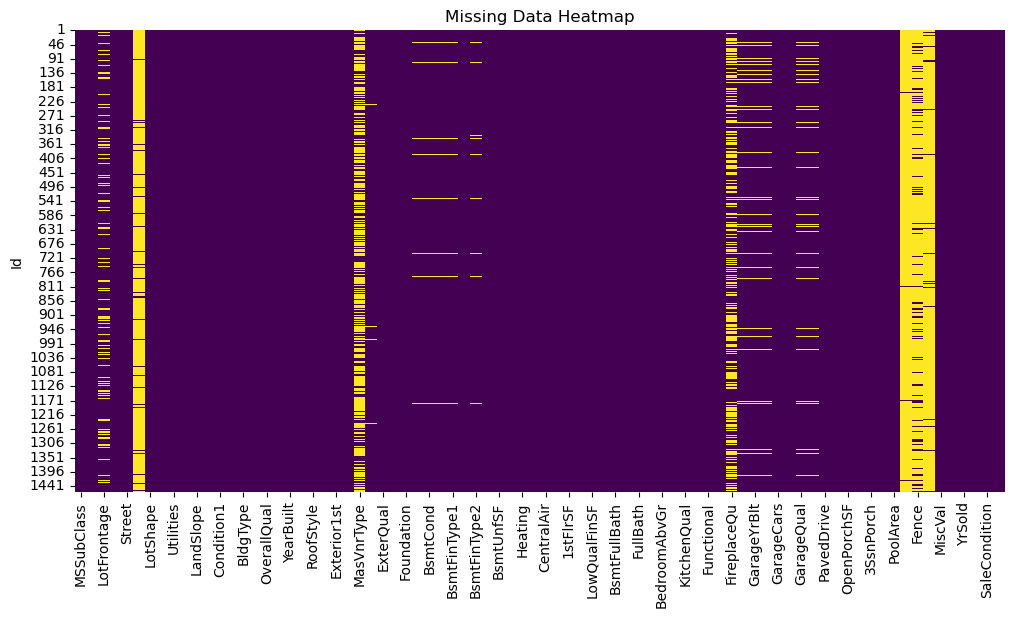

In [14]:
plot_missing_data(data_train)

In [15]:
data_train.duplicated().sum()

0

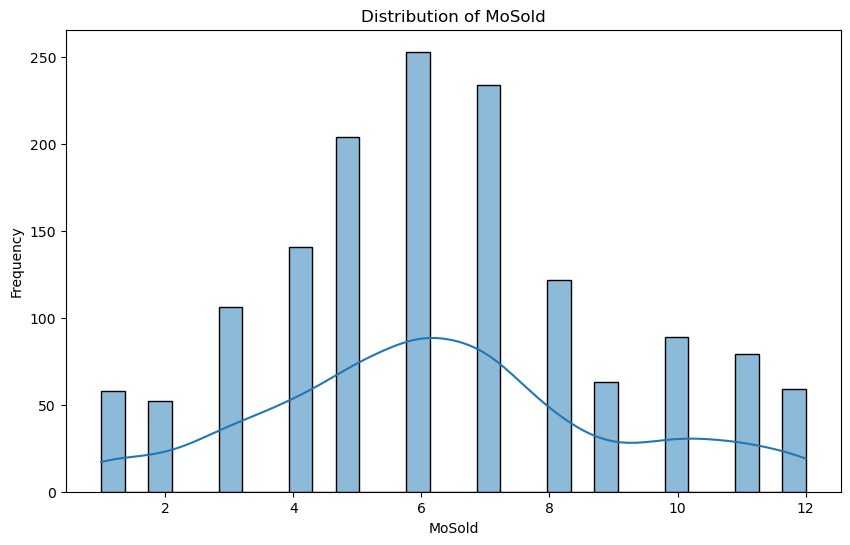

In [16]:
plot_feature_distribution(data_train, 'MoSold')


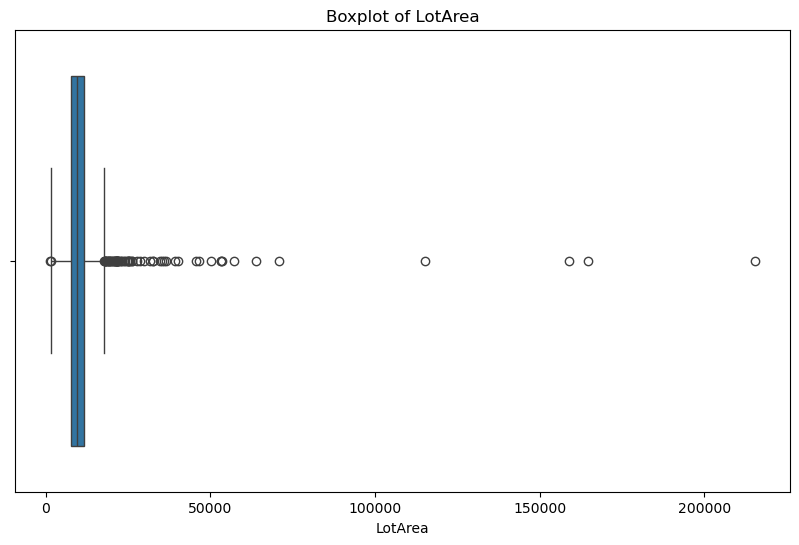

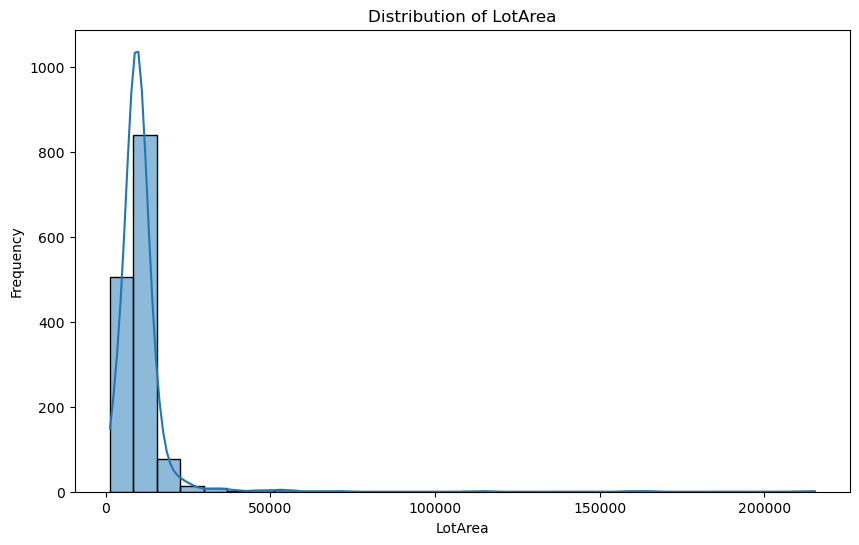

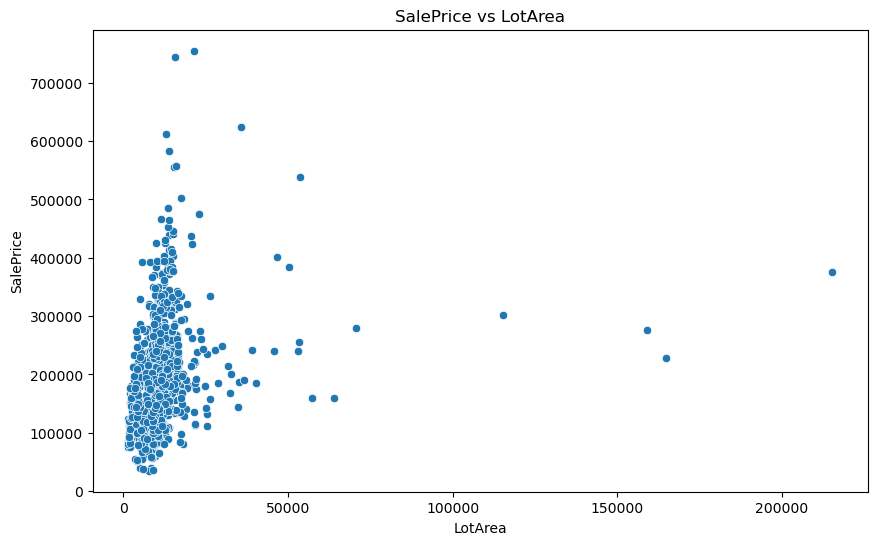

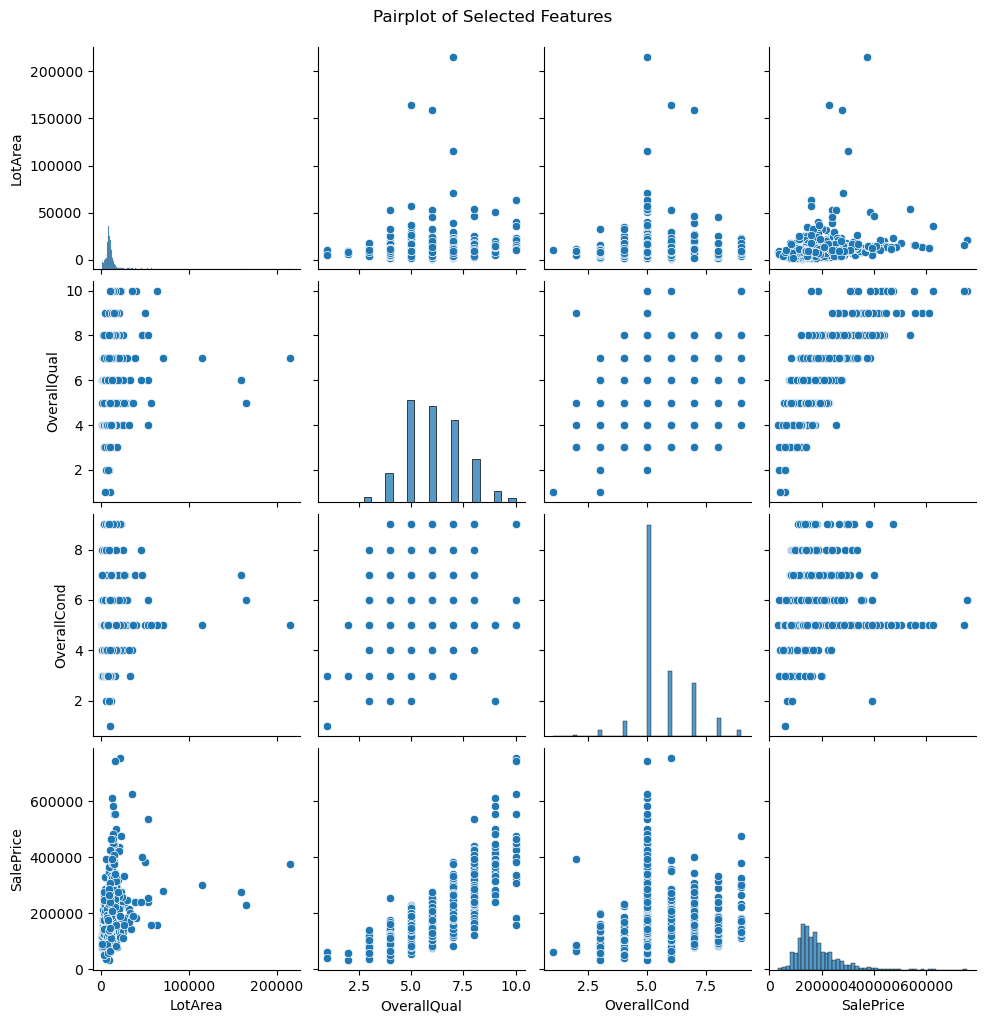

In [17]:
plot_boxplot(data_train, 'LotArea')
plot_feature_distribution(data_train, 'LotArea')
plot_scatter(data_train, 'LotArea', 'SalePrice')
plot_pairplot(data_train, ['LotArea', 'OverallQual', 'OverallCond', 'SalePrice'])

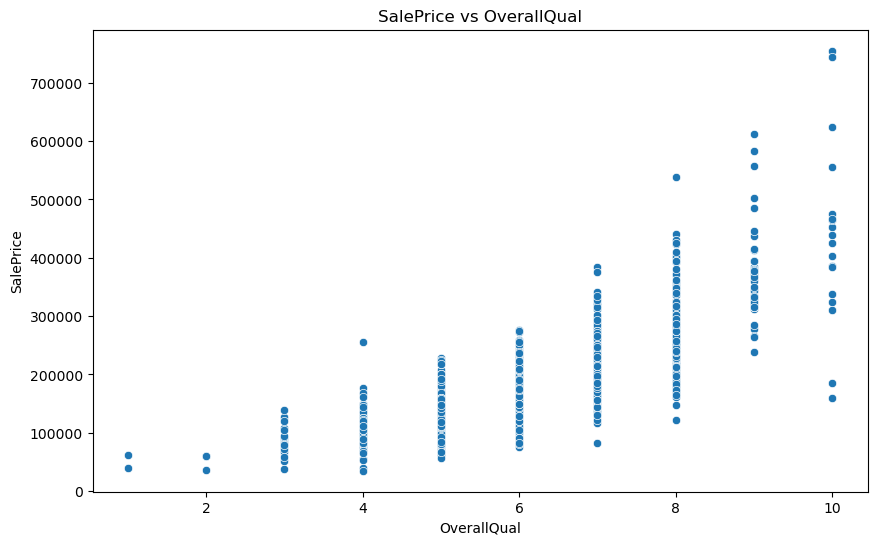

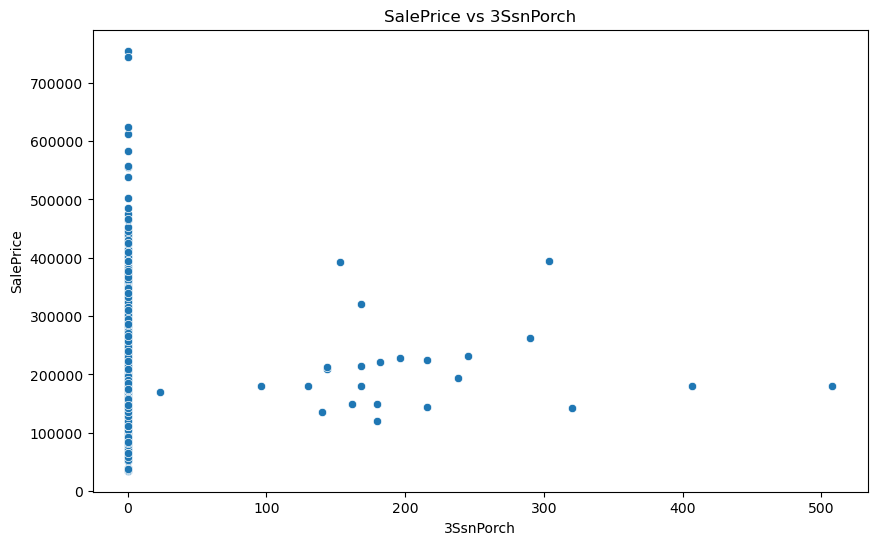

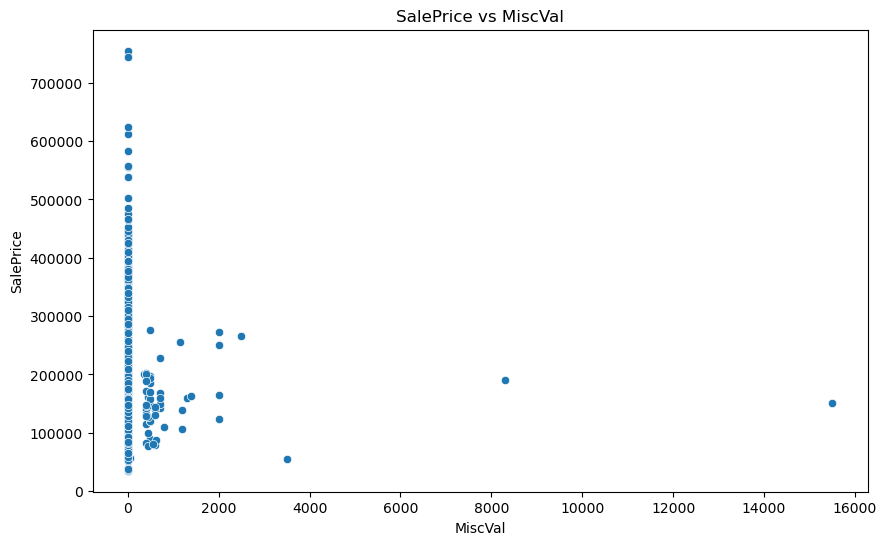

In [18]:
plot_scatter(data_train, 'OverallQual', 'SalePrice')
plot_scatter(data_train, '3SsnPorch', 'SalePrice')
plot_scatter(data_train, 'MiscVal', 'SalePrice')

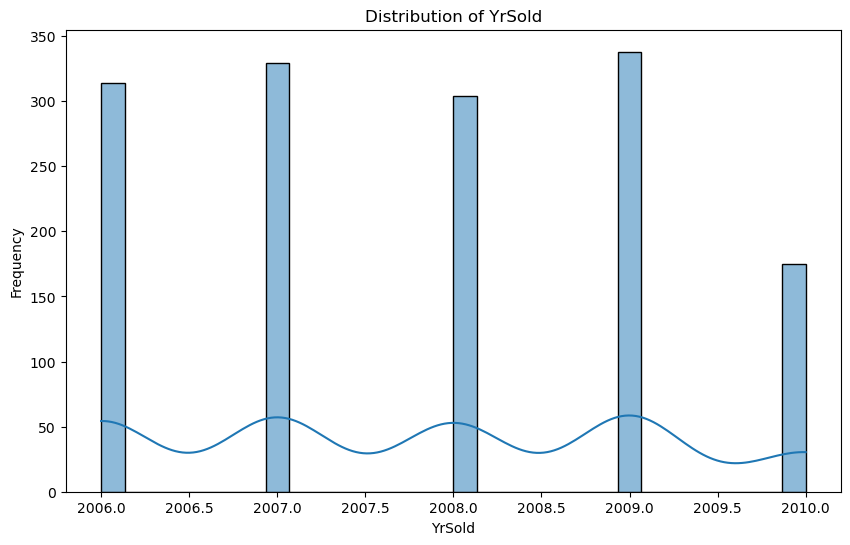

In [19]:
plot_feature_distribution(data_train, 'YrSold')


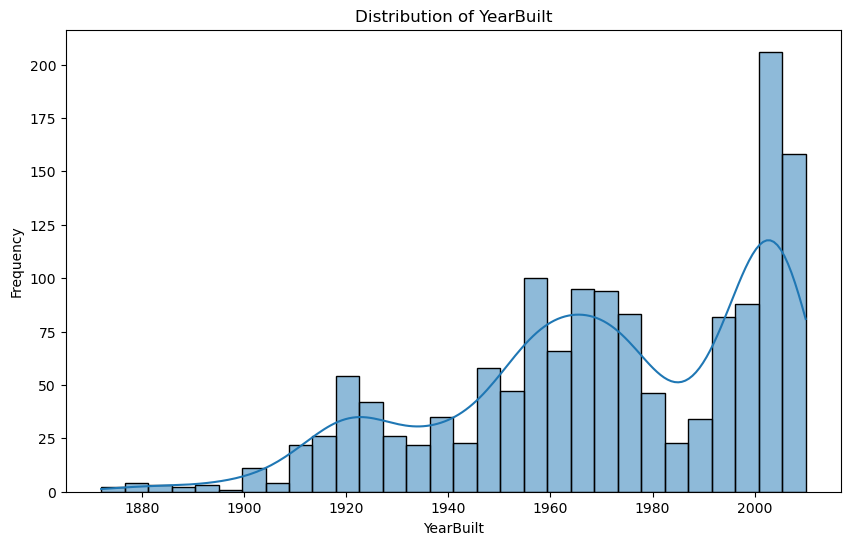

In [20]:
plot_feature_distribution(data_train, 'YearBuilt')


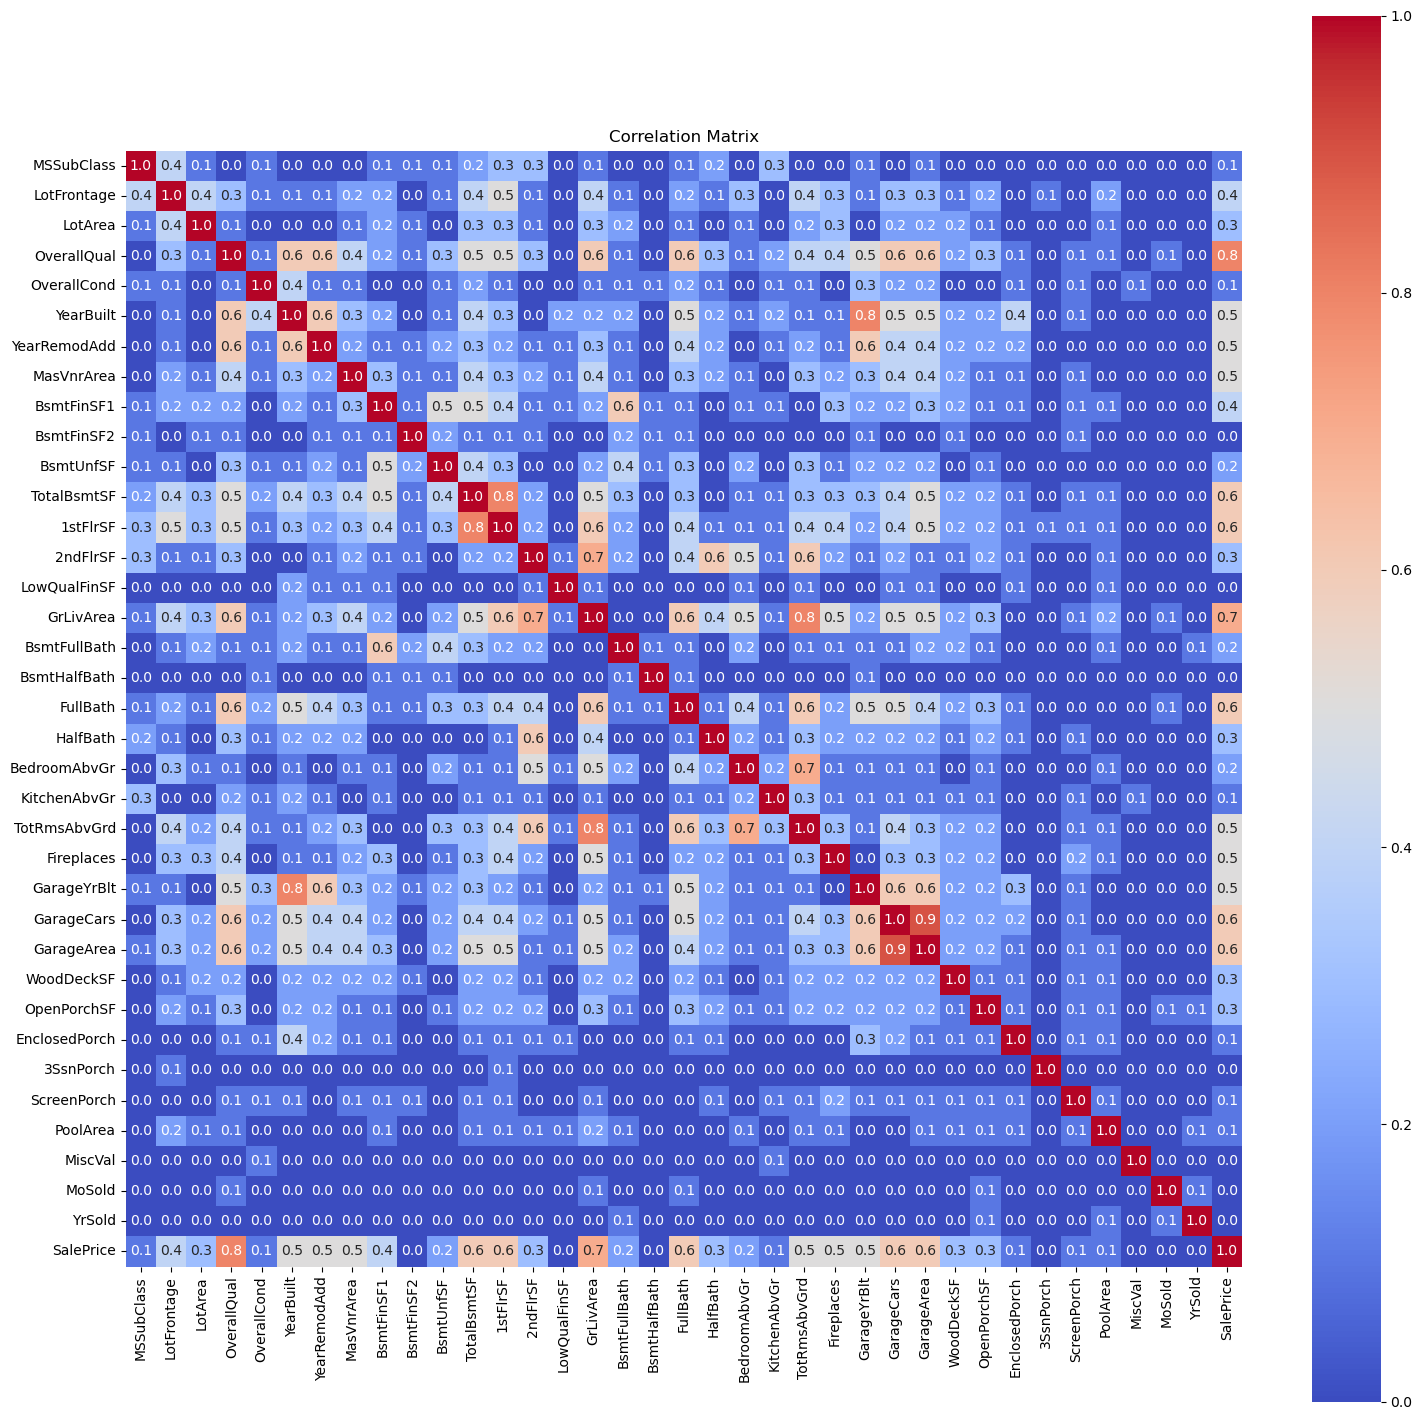

In [21]:
plot_correlation_matrix(pd.DataFrame(data_train.select_dtypes(include=['number'])))

# Feature Engineering

In [22]:
# data_train["HouseAgeRemodAtSale"] = data_train["YrSold"]-data_train["YearRemodAdd"]
# data_train.drop(columns=["YearRemodAdd", "YrSold"], inplace=True)

In [23]:
data_train.fillna({"MasVnrArea": 0}, inplace=True)
data_train.fillna({"GarageYrBlt": data_train["GarageYrBlt"].median()}, inplace=True)
data_train.fillna({"LotFrontage": data_train["LotFrontage"].mean()}, inplace=True)
data_train.fillna({"GarageType": "None"}, inplace=True)
data_train.fillna({"GarageFinish": "None"}, inplace=True)
data_train.fillna({"GarageQual": "None"}, inplace=True)
data_train.fillna({"GarageCond": "None"}, inplace=True)
data_train.fillna({"PoolQC": "None"}, inplace=True)
data_train.fillna({"Fence": "None"}, inplace=True)
data_train.fillna({"MiscFeature": "None"}, inplace=True)
data_train.fillna({"Alley": "None"}, inplace=True)
data_train.fillna({"MasVnrType": "None"}, inplace=True)
data_train.fillna({"Electrical": data_train["Electrical"].mode()[0]}, inplace=True)
data_train.fillna({"BsmtQual": "None"}, inplace=True)
data_train.fillna({"BsmtCond": "None"}, inplace=True)
data_train.fillna({"BsmtExposure": "None"}, inplace=True)
data_train.fillna({"BsmtFinType1": "None"}, inplace=True)
data_train.fillna({"BsmtFinType2": "None"}, inplace=True)
data_train.fillna({"FireplaceQu": "None"}, inplace=True)


In [24]:
categorical_features = data_train.select_dtypes(include=["object"]).columns

In [25]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [26]:
df_encoded = pd.get_dummies(data_train, columns=categorical_features, drop_first=True)

In [27]:
df_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,False,True,False,False,False,True,False
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,False,True,False,False,False,True,False


In [28]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(
scaler.fit_transform(df_encoded.drop(columns=["SalePrice"])),
    columns=df_encoded.drop(columns=["SalePrice"]).columns, index=df_encoded.index
)


In [29]:
df_scaled

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
4,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
5,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


Isolation Forest : algorithme pour detecter les anomalies ou outliers
les parametres fondamentaux:
- n_estimators : le nombre de base estimators ou autrement dit le nombre d'arbres à entrainer 
- max_samples: le nombre d'observations à tirer aléatoirement ou la proportion à tirer. par défaut, c'est "auto"
- contamination : proportion d'outliers soupçonnés entre 0 et 0.5 ou "auto"
- max_features : Proportion des features utilisées pour chaque split
- bootstrap : échantillonnage avec replacement ou non

In [30]:
clf = IsolationForest(contamination="auto", n_estimators=200, max_samples=0.5, random_state=42)
data_train["anomaly"] = clf.fit_predict(df_scaled)

In [31]:
scores = clf.decision_function(df_scaled)
scores

array([0.15920995, 0.109813  , 0.15132236, ..., 0.06988117, 0.12134081,
       0.13303487])

In [32]:
data_train_clean = df_scaled[data_train["anomaly"] == 1]

In [33]:
data_train_clean

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
4,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
5,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [34]:
data_train[data_train["anomaly"] == -1]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,anomaly
Id,,,,,,,,,,,,,,,,,,,,,
534,20,RL,50.0,5000,Pave,None,Reg,Low,AllPub,Inside,...,None,None,None,0,1,2007,WD,Normal,39300,-1
636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,...,None,None,None,0,3,2007,WD,Abnorml,200000,-1
706,190,RM,70.0,5600,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,Othr,3500,7,2010,WD,Normal,55000,-1
1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,...,Gd,None,None,0,1,2008,New,Partial,160000,-1


In [35]:
data_train_clean = pd.merge(data_train_clean, pd.DataFrame(data_train["SalePrice"]), how='inner', on='Id')

In [36]:
pd.DataFrame(data_train_clean.corr().loc["SalePrice",:]).T


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
SalePrice,-0.083181,0.351663,0.266806,0.793432,-0.081928,0.523334,0.505579,0.475594,0.405903,-0.012076,...,-0.027667,0.359567,-0.035071,-0.243297,-0.05091,-0.015769,-0.046849,-0.153762,0.354034,1.0


# Entrainement des modèles

In [37]:
X = data_train_clean.drop(columns=['SalePrice'])
y = data_train_clean['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [39]:
y_pred.min(), y_pred.max(), y_pred.mean(), y_pred.std()

(11539.01812222469, 485147.7642915151, 176310.2430722093, 79318.41484071448)

In [40]:
print_metrics(y_test, y_pred)

Model Performance Metrics
MAE   : 17172.2302
RMSE  : 27178.1033
RMSLE : 0.2133
MAPE  : 0.1089
R²    : 0.8941


In [41]:
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [-3.22032504e+03  5.15709235e+02  6.18936082e+03  8.40332397e+03
  7.26766485e+03  1.30822119e+04  1.27129012e+03  4.57459647e+03
  8.63604693e+03  1.50642169e+03 -5.85128139e+02  8.94302020e+03
  4.85157763e+03  1.30354050e+04 -2.24642621e+03  1.41901724e+04
  1.50082575e+03 -4.16086931e+02  1.94549945e+03  7.42573695e+02
 -3.03902471e+03 -2.02844632e+03  4.93010335e+03  5.76437463e+03
  5.86230367e+02  1.24533611e+03  4.60603883e+03  1.68308811e+03
  3.06440738e+02  1.63640580e+02  1.47128841e+03  1.87507022e+03
  2.98030242e+04  2.57667824e+03 -1.25223112e+03 -4.81622589e+02
  4.36122607e+03  6.17911670e+02  5.30707839e+03  3.89787766e+03
  1.86788137e+03 -1.09222644e+03  5.60996297e+02  1.12678721e+03
  7.61561458e+02  1.14903008e+03  1.53417670e+03 -1.99030537e+03
  1.39255021e+03 -7.82475911e+02  1.95406477e+03 -1.12110322e+03
 -7.20096839e+02 -2.34053466e+02  9.83794598e+02 -3.52049707e+03
  1.29148248e-10 -1.11899859e+03 -2.74041258e+03 -2.42837276e+03
 -4.8870449

In [42]:
# Interpretation of coefficients
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

MSSubClass: -3220.33
LotFrontage: 515.71
LotArea: 6189.36
OverallQual: 8403.32
OverallCond: 7267.66
YearBuilt: 13082.21
YearRemodAdd: 1271.29
MasVnrArea: 4574.60
BsmtFinSF1: 8636.05
BsmtFinSF2: 1506.42
BsmtUnfSF: -585.13
TotalBsmtSF: 8943.02
1stFlrSF: 4851.58
2ndFlrSF: 13035.40
LowQualFinSF: -2246.43
GrLivArea: 14190.17
BsmtFullBath: 1500.83
BsmtHalfBath: -416.09
FullBath: 1945.50
HalfBath: 742.57
BedroomAbvGr: -3039.02
KitchenAbvGr: -2028.45
TotRmsAbvGrd: 4930.10
Fireplaces: 5764.37
GarageYrBlt: 586.23
GarageCars: 1245.34
GarageArea: 4606.04
WoodDeckSF: 1683.09
OpenPorchSF: 306.44
EnclosedPorch: 163.64
3SsnPorch: 1471.29
ScreenPorch: 1875.07
PoolArea: 29803.02
MiscVal: 2576.68
MoSold: -1252.23
YrSold: -481.62
MSZoning_FV: 4361.23
MSZoning_RH: 617.91
MSZoning_RL: 5307.08
MSZoning_RM: 3897.88
Street_Pave: 1867.88
Alley_None: -1092.23
Alley_Pave: 561.00
LotShape_IR2: 1126.79
LotShape_IR3: 761.56
LotShape_Reg: 1149.03
LandContour_HLS: 1534.18
LandContour_Low: -1990.31
LandContour_Lvl: 139

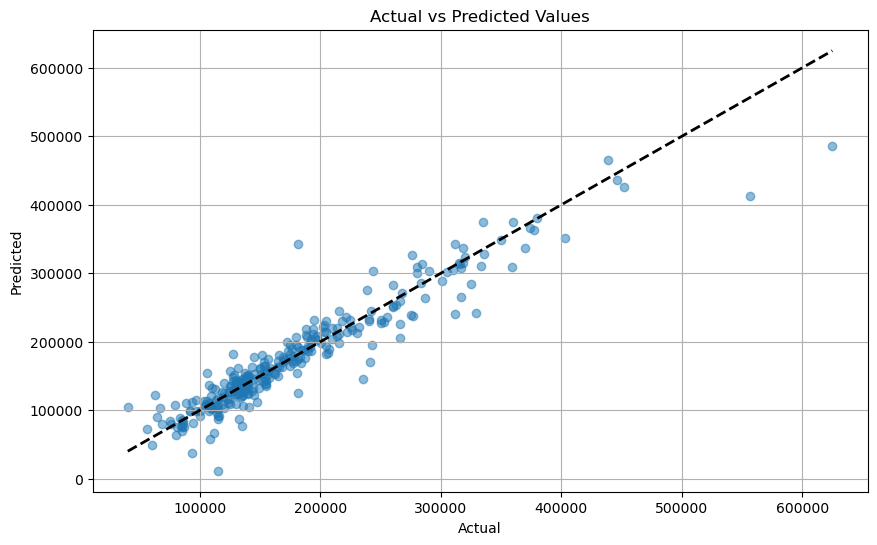

In [43]:
plot_predictions(y_test, y_pred)

Ridge vise à Régulariser le modèle en réduisant la variance des coefficients (shrinkage), en ajoutant une pénalité L2
toujours scale
Ne met jamais les coefficients à zéro → toutes les variables sont conservées.
Répartit le poids entre les variables corrélées
RidgeCv est une version de la régression Ridge avec validation croisée automatique sur les hyperparamètres
- alphas : force de régualtion, plus il est grand plus la régualtion est forte
- cv : le nombre de split ou un générateur cross validation
- scoring : la métrique pour cross validation

In [44]:

model = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 200], cv=5, scoring='neg_mean_squared_log_error')
model.fit(X_train, y_train)

print("Meilleur alpha :", model.alpha_)


Meilleur alpha : 200.0


In [45]:
print_metrics(y_test, model.predict(X_test))

Model Performance Metrics
MAE   : 16020.5521
RMSE  : 24324.2952
RMSLE : 0.1420
MAPE  : 0.0971
R²    : 0.9152


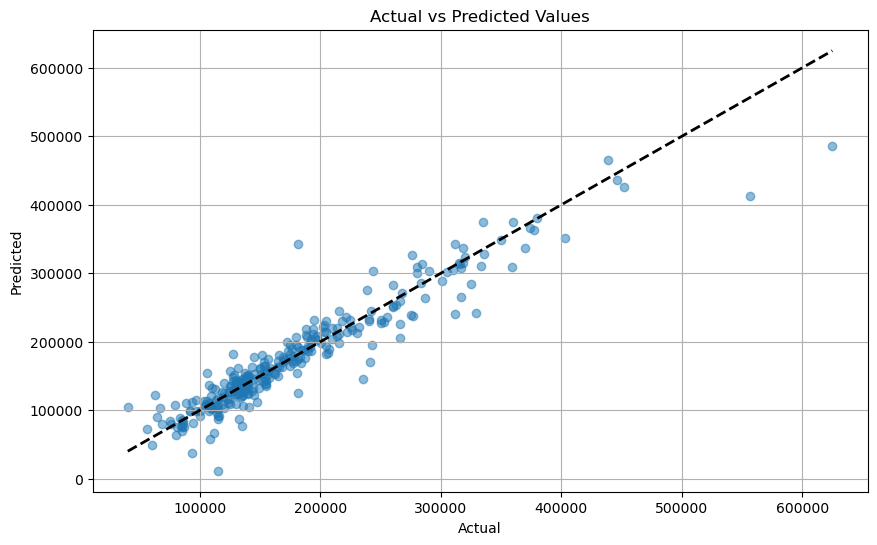

In [46]:
plot_predictions(y_test, y_pred)

Lasso vise à appliquer une régularisation L1
toujours scale
- Réduit certains coefficients à zéro donc sélection automatique de variables Très utile quand tu as beaucoup de variables et tu soupçonnes que toutes ne sont pas utiles
- Lasso peut être instable quand plusieurs variables sont fortement corrélées car choisit une seule variable parmi les corrélées et met les autres à zéro
LassoCv est une version à cross validation
- alphas : force de régualtion, plus il est grand plus la régualtion est forte
- cv : le nombre de split ou un générateur cross validation
- max_iter : nombre d'iterations 

In [47]:

model = LassoCV(alphas=[0.01, 0.1, 1, 10, 100, 200, 300, 400], cv=5)
model.fit(X_train, y_train)

print("Meilleur alpha :", model.alpha_)


Meilleur alpha : 400.0


In [48]:
print_metrics(y_test, model.predict(X_test))


Model Performance Metrics
MAE   : 15169.0020
RMSE  : 23656.8061
RMSLE : 0.1444
MAPE  : 0.0933
R²    : 0.9198


In [49]:
print(model.coef_)  # Voir les coefficients sélectionnés
print(model.intercept_)  # Voir l'ordonnée à l'origine

[-3.98371883e+03  5.23078289e+02  4.31780792e+03  1.15105059e+04
  6.60932675e+03  1.07550459e+04  1.80163645e+03  3.92078324e+03
  8.78082461e+03  1.00815026e+03 -0.00000000e+00  7.73822445e+03
  0.00000000e+00  1.77579840e+03 -1.36255367e+03  2.44492327e+04
  8.55284835e+02 -5.08927155e+02  7.92960354e+02  8.26591666e+01
 -2.50816090e+03 -1.91799966e+03  4.05495016e+03  2.54536185e+03
  9.17203977e+02  1.55612786e+03  4.05579878e+03  1.26177502e+03
  4.41096773e+02 -0.00000000e+00  7.37151242e+02  1.77606887e+03
  6.44242555e+03  0.00000000e+00 -9.72364909e+02  0.00000000e+00
  1.33289321e+03 -0.00000000e+00  0.00000000e+00 -6.01614059e+02
  1.01847614e+03 -0.00000000e+00  0.00000000e+00  1.19074527e+03
  2.47677232e+02  0.00000000e+00  5.30593273e+02 -1.14317863e+03
  1.91290910e+02 -3.94731575e+02  1.54568941e+03 -5.14057484e+02
 -3.91727709e+02  0.00000000e+00  2.47644741e+02 -1.82827339e+03
  0.00000000e+00  0.00000000e+00  1.09233566e+03 -0.00000000e+00
  0.00000000e+00  3.55980

In [50]:
# Interpretation of coefficients
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

MSSubClass: -3983.72
LotFrontage: 523.08
LotArea: 4317.81
OverallQual: 11510.51
OverallCond: 6609.33
YearBuilt: 10755.05
YearRemodAdd: 1801.64
MasVnrArea: 3920.78
BsmtFinSF1: 8780.82
BsmtFinSF2: 1008.15
BsmtUnfSF: -0.00
TotalBsmtSF: 7738.22
1stFlrSF: 0.00
2ndFlrSF: 1775.80
LowQualFinSF: -1362.55
GrLivArea: 24449.23
BsmtFullBath: 855.28
BsmtHalfBath: -508.93
FullBath: 792.96
HalfBath: 82.66
BedroomAbvGr: -2508.16
KitchenAbvGr: -1918.00
TotRmsAbvGrd: 4054.95
Fireplaces: 2545.36
GarageYrBlt: 917.20
GarageCars: 1556.13
GarageArea: 4055.80
WoodDeckSF: 1261.78
OpenPorchSF: 441.10
EnclosedPorch: -0.00
3SsnPorch: 737.15
ScreenPorch: 1776.07
PoolArea: 6442.43
MiscVal: 0.00
MoSold: -972.36
YrSold: 0.00
MSZoning_FV: 1332.89
MSZoning_RH: -0.00
MSZoning_RL: 0.00
MSZoning_RM: -601.61
Street_Pave: 1018.48
Alley_None: -0.00
Alley_Pave: 0.00
LotShape_IR2: 1190.75
LotShape_IR3: 247.68
LotShape_Reg: 0.00
LandContour_HLS: 530.59
LandContour_Low: -1143.18
LandContour_Lvl: 191.29
Utilities_NoSeWa: -394.73
L

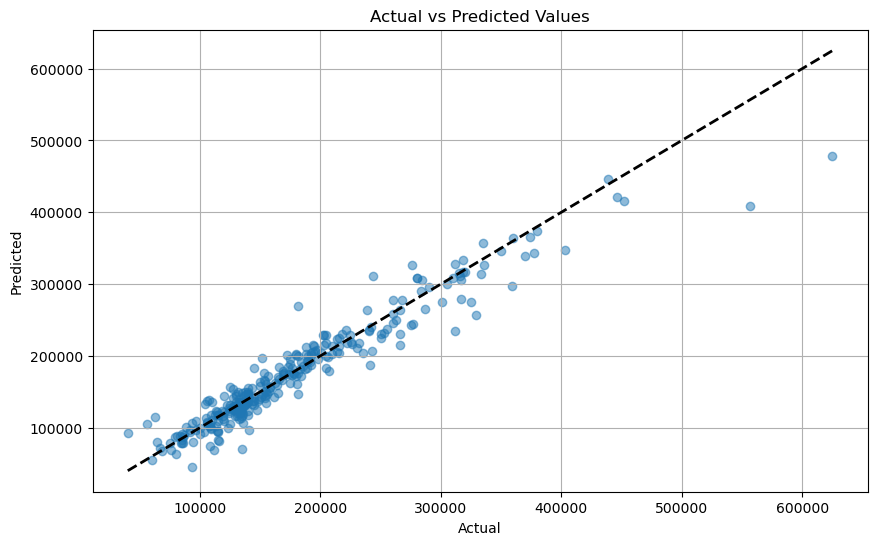

In [51]:
plot_predictions(y_test, model.predict(X_test))

ElasticNet combine les deux régulations
- l1 ratio : compromis l1
- alphas : force de régualtion, plus il est grand plus la régualtion est forte
- cv : le nombre de split ou un générateur cross validation
- max_iter : nombre d'iterations 

In [52]:

model = ElasticNetCV(alphas=[0.01, 0.1, 1, 10], l1_ratio=[0.01, 0.1, 10], random_state=42, cv=5)  
# alpha = force de régularisation
# l1_ratio = mix L1/L2 (0 = Ridge, 1 = Lasso)

# 4. Entraîner
model.fit(X_train, y_train)
print("Meilleur alpha :", model.alpha_)
print("Meilleur l1_ratio :", model.l1_ratio_)


Meilleur alpha : 1.0
Meilleur l1_ratio : 0.1


In [53]:
print_metrics(y_test, model.predict(X_test))

Model Performance Metrics
MAE   : 17609.9560
RMSE  : 27855.0024
RMSLE : 0.1412
MAPE  : 0.1024
R²    : 0.8888


In [54]:
# Interpretation of coefficients
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

MSSubClass: -1740.81
LotFrontage: 2244.56
LotArea: 2735.66
OverallQual: 6863.64
OverallCond: 2614.29
YearBuilt: 2065.06
YearRemodAdd: 2460.21
MasVnrArea: 3914.50
BsmtFinSF1: 4850.94
BsmtFinSF2: 534.95
BsmtUnfSF: 281.72
TotalBsmtSF: 5523.88
1stFlrSF: 5500.14
2ndFlrSF: 3621.17
LowQualFinSF: -78.57
GrLivArea: 7047.34
BsmtFullBath: 1792.27
BsmtHalfBath: -277.92
FullBath: 3157.81
HalfBath: 2202.80
BedroomAbvGr: 87.73
KitchenAbvGr: -1385.38
TotRmsAbvGrd: 4746.48
Fireplaces: 3360.39
GarageYrBlt: 1518.84
GarageCars: 3325.09
GarageArea: 4004.72
WoodDeckSF: 2003.18
OpenPorchSF: 1705.23
EnclosedPorch: -216.52
3SsnPorch: 746.49
ScreenPorch: 1556.34
PoolArea: 2163.04
MiscVal: 113.35
MoSold: -820.68
YrSold: 280.82
MSZoning_FV: 545.86
MSZoning_RH: 0.72
MSZoning_RL: 928.81
MSZoning_RM: -970.89
Street_Pave: 628.09
Alley_None: 109.54
Alley_Pave: 207.02
LotShape_IR2: 1286.28
LotShape_IR3: 341.64
LotShape_Reg: -578.59
LandContour_HLS: 790.94
LandContour_Low: -473.13
LandContour_Lvl: 428.34
Utilities_NoSeW

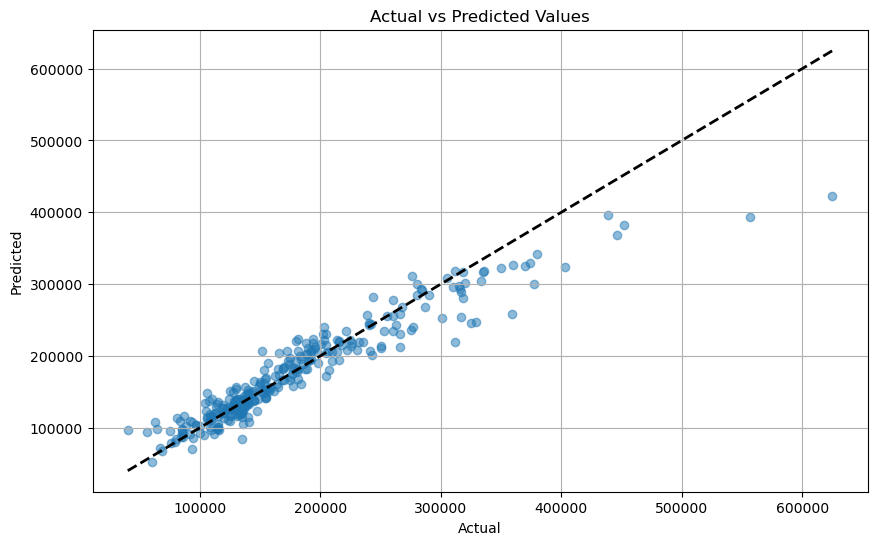

In [55]:
plot_predictions(y_test, model.predict(X_test))

criterion
max_depth
min_samples_split
min_samples_leaf
max_features : int, float or {“sqrt”, “log2”} du n_features, default=None

In [56]:
# from sklearn.model_selection import GridSearchCV

# cv = GridSearchCV(
#     DecisionTreeRegressor(random_state=42),
#     param_grid={
#         'max_depth': [3, 5, 7, 10, 15, 16, 17, 18, 20],
#         'criterion': ['mse', 'friedman_mse', 'mae'],
#         'min_samples_split': [2, 5, 10, 11, 12, 13, 14, 15, 20],
#         'min_samples_leaf': [1, 2, 4, 5, 6, 8, 10],
#         'max_features': ['sqrt', 'log2']
#     },
#     cv=10,
#     scoring='neg_mean_squared_log_error',
# )


In [57]:
# cv.fit(X_train, y_train)
# print("Meilleurs paramètres :", cv.best_params_)
# print("Meilleur score :", cv.best_score_)
# y_pred = cv.predict(X_test)

In [58]:
dt = DecisionTreeRegressor(max_depth=10, random_state=42, criterion = 'friedman_mse',  max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 10)

# Entraîner
dt.fit(X_train, y_train)

# Prédire
y_pred = dt.predict(X_test)

In [59]:
print_metrics(y_test,y_pred)

Model Performance Metrics
MAE   : 27751.1869
RMSE  : 43331.7195
RMSLE : 0.2052
MAPE  : 0.1596
R²    : 0.7309


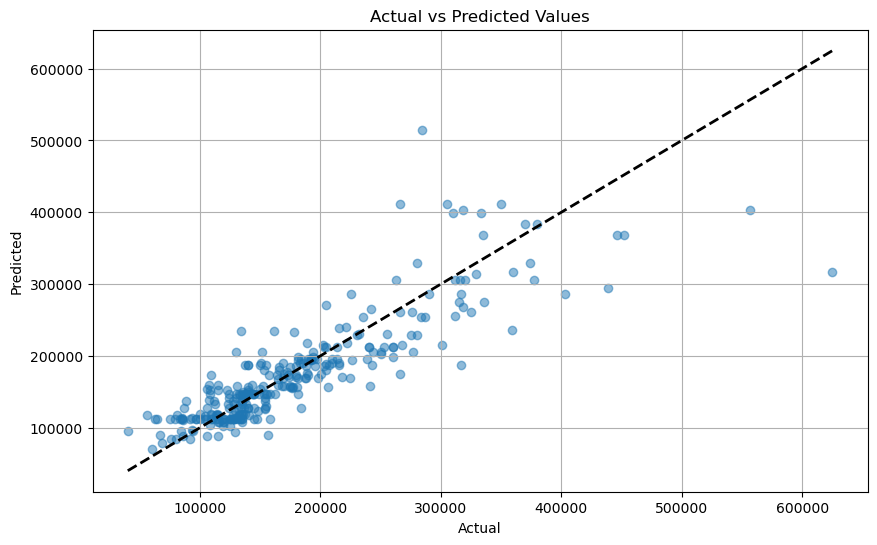

In [60]:
plot_predictions(y_test, y_pred)

n_neighborsint, default=5
Number of neighbors to use by default for kneighbors queries.

weights{‘uniform’, ‘distance’}

n_neighbors	    nombre de voisins k
weights 	    'uniform' (moyenne) ou 'distance' (pondéré par distance)
metric	        distance (par défaut : euclidienne)
p	            puissance pour la distance de Minkowski (p=1 = manhattan, p=2 = euclidienne)
algorithm       {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’

In [61]:
# cv = GridSearchCV(
#     KNeighborsRegressor(),
#     param_grid={
#         'n_neighbors': [3, 5, 7, 8,9,10,11],
#     },
#     cv=10,
#     scoring='neg_mean_squared_log_error',
# )

In [62]:
# cv.fit(X_train, y_train)
# print("Meilleurs paramètres :", cv.best_params_)
# print("Meilleur score :", cv.best_score_)
# y_pred = cv.predict(X_test)

In [63]:
# 4. Initialiser KNN Regressor
knn = KNeighborsRegressor(n_neighbors=9, weights='distance')

# 5. Entraîner (en réalité, KNN "mémorise" les données)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [64]:
print_metrics(y_test, y_pred)

Model Performance Metrics
MAE   : 24786.2069
RMSE  : 40555.6381
RMSLE : 0.2079
MAPE  : 0.1481
R²    : 0.7643


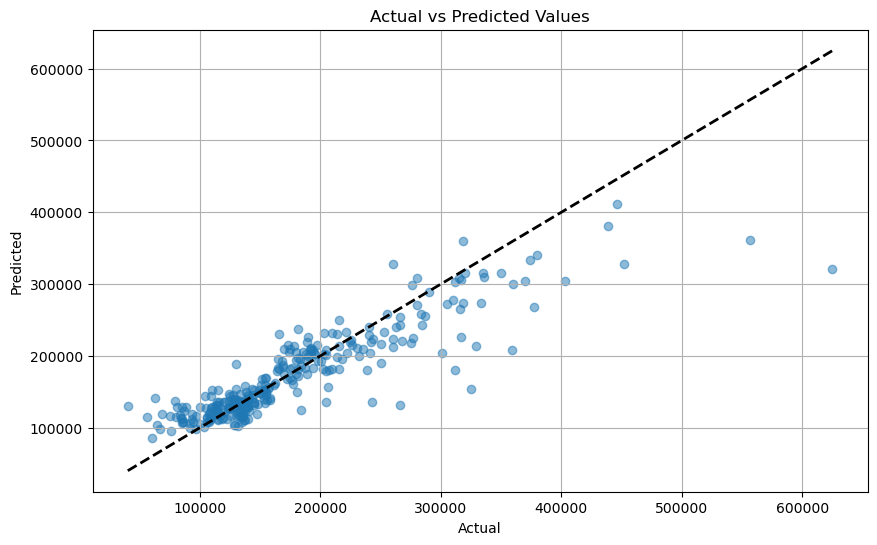

In [65]:
plot_predictions(y_test, y_pred)

C	    Pénalise les erreurs hors marge ε (plus grand C → moins d'erreurs tolérées)
epsilon	Zone d’approximation tolérée autour de la vérité
kernel	'linear', 'poly', 'rbf' (défaut), 'sigmoid'
gamma	Contrôle l’influence d’un point (surtout avec RBF)
degree  Pour kernel='poly'

In [66]:
scaler_y = StandardScaler()

y_scaled = scaler_y.fit_transform(np.array(y).reshape(-1, 1)).ravel()

# 3. Split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y_scaled, test_size=0.2, random_state=42)


degree

In [67]:
# cv = GridSearchCV(
#     SVR(),
#     param_grid={
#     'C': [0.1, 1, 10],
#     'epsilon': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
#     'kernel': ['rbf'],
#     },
#     cv=10,
#     scoring='neg_mean_squared_log_error',
# )

In [68]:
# cv.fit(X_train_, y_train_)
# print("Meilleurs paramètres :", cv.best_params_)
# print("Meilleur score :", cv.best_score_)

In [69]:

scaler_y = StandardScaler()

y_scaled = scaler_y.fit_transform(np.array(y).reshape(-1, 1)).ravel()

# 3. Split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# 4. SVR avec kernel RBF
model = SVR(kernel='rbf', C=10, epsilon=0.1)

# 5. Entraîner
model.fit(X_train_, y_train_)

# 6. Prédire
y_pred_scaled = model.predict(X_test_)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_true = scaler_y.inverse_transform(y_test_.reshape(-1, 1))

In [70]:
print_metrics(y_true, y_pred)

Model Performance Metrics
MAE   : 22015.4390
RMSE  : 36264.3026
RMSLE : 0.2290
MAPE  : 0.1542
R²    : 0.8115


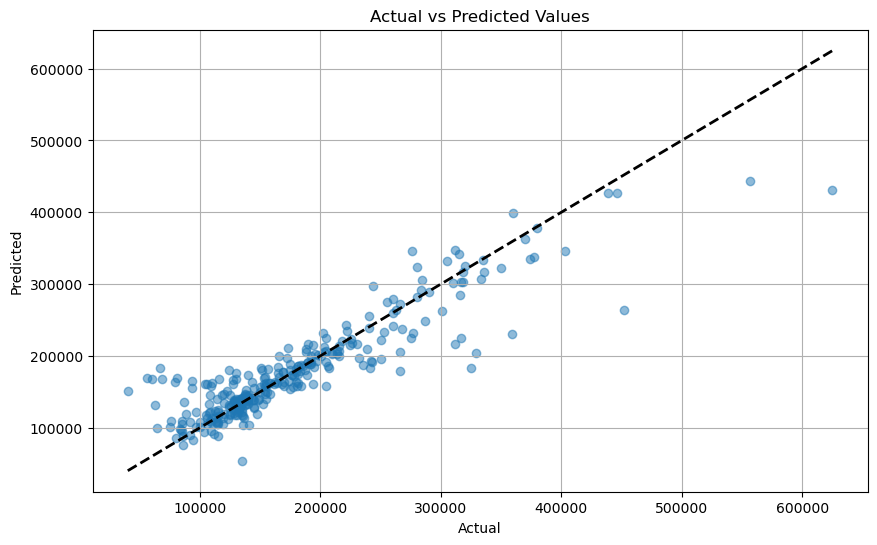

In [71]:
plot_predictions(y_true, y_pred)

In [72]:

# 4. Initialiser MLP
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32, 16),  # 3 couches : 128 → 64 → 32 neurones
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    alpha=1e-1,  # L2 regularization
    batch_size=16,
    random_state=42
)

# 5. Entraîner
mlp.fit(X_train_, y_train_)

# 6. Prédire
y_pred_scaled = mlp.predict(X_test_)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))



In [73]:
print_metrics(y_true, y_pred)

Model Performance Metrics
MAE   : 15924.0674
RMSE  : 23628.8941
RMSLE : 0.1385
MAPE  : 0.0973
R²    : 0.9200


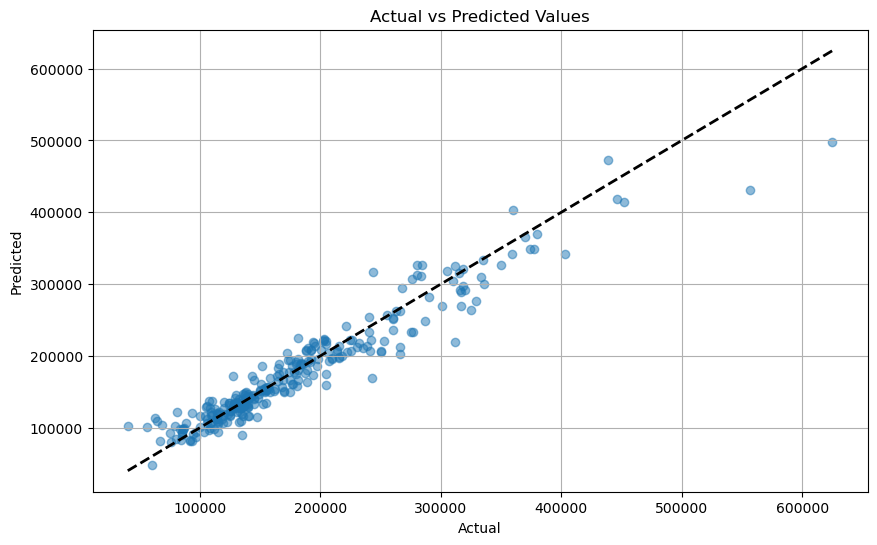

In [74]:
plot_predictions(y_true, y_pred)

In [75]:
# cv = GridSearchCV(
#     RandomForestRegressor(),
#     param_grid={
#         'n_estimators': [100, 200],
#         'max_depth': [ 5, 7, 10],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'max_features': [None, 'sqrt']
#     },
#     cv=5,
#     scoring='neg_mean_squared_log_error',
# )
# cv.fit(X_train, y_train)
# print("Meilleurs paramètres :", cv.best_params_)

In [76]:

rf = RandomForestRegressor(
    n_estimators=100,    # nombre d’arbres
    max_depth=10,      # profondeur des arbres
    min_samples_split=2, # nombre minimum d’échantillons pour diviser un nœud
    min_samples_leaf=2,  # nombre minimum d’échantillons dans une feuille
    max_features=None, # nombre maximum de caractéristiques à considérer pour la meilleure séparation
    criterion='friedman_mse',  # critère de qualité de séparation
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [77]:
print_metrics(y_test, y_pred)

Model Performance Metrics
MAE   : 16453.4568
RMSE  : 24746.5129
RMSLE : 0.1441
MAPE  : 0.1027
R²    : 0.9122


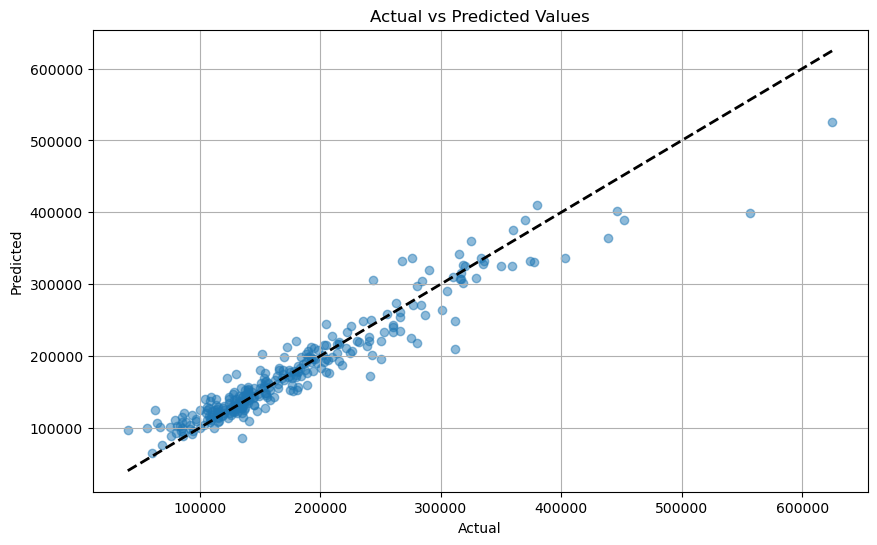

In [78]:
plot_predictions(y_test, y_pred)

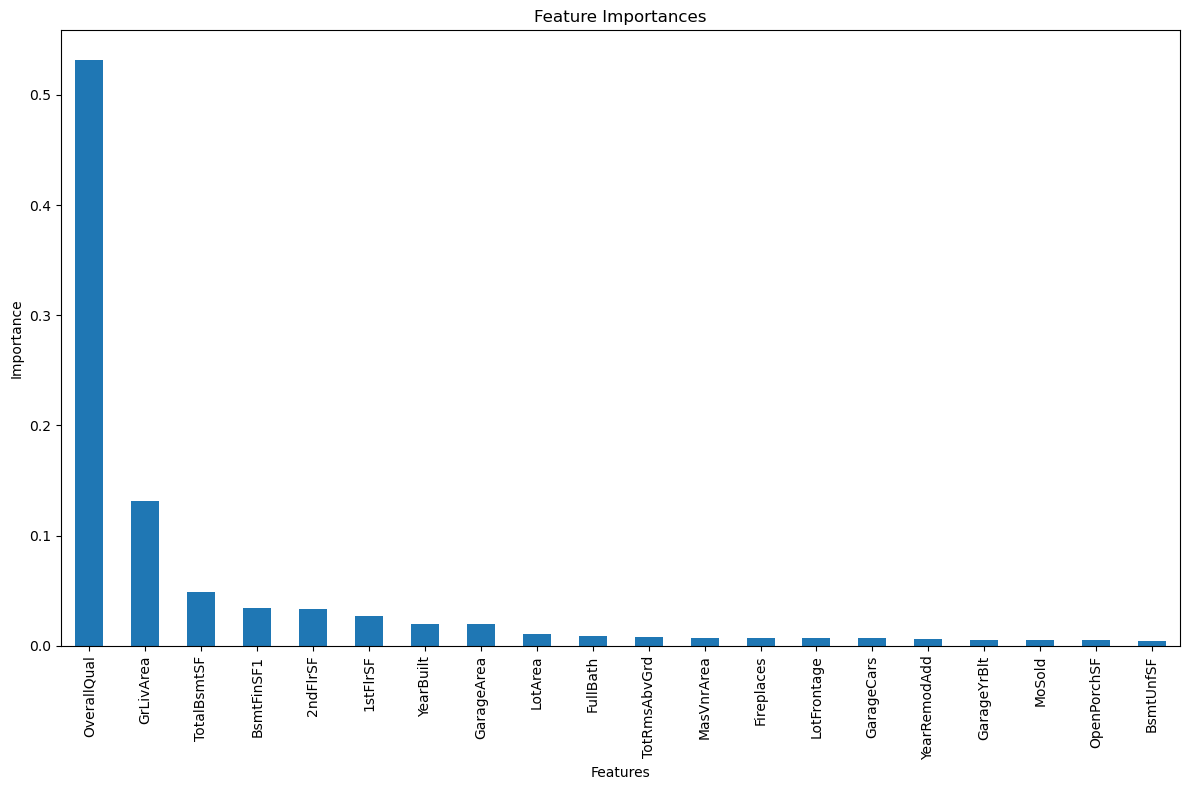

In [79]:
importances = rf.feature_importances_
 
plot_feature_importances(importances, X_train)

In [80]:
dtrain = DMatrix(X_train, label=y_train)

params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}

results = cv(params, dtrain, num_boost_round=200, nfold=5,
             early_stopping_rounds=10, metrics="rmse", seed=42)
print("Best RMSE:", results['test-rmse-mean'].min())
print("Best iteration:", results['test-rmse-mean'].idxmin())

Best RMSE: 30476.175527668274
Best iteration: 152


In [81]:

model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [82]:
print_metrics(y_test, model.predict(X_test))

Model Performance Metrics
MAE   : 14855.0176
RMSE  : 21941.0586
RMSLE : 0.1335
MAPE  : 0.0922
R²    : 0.9310


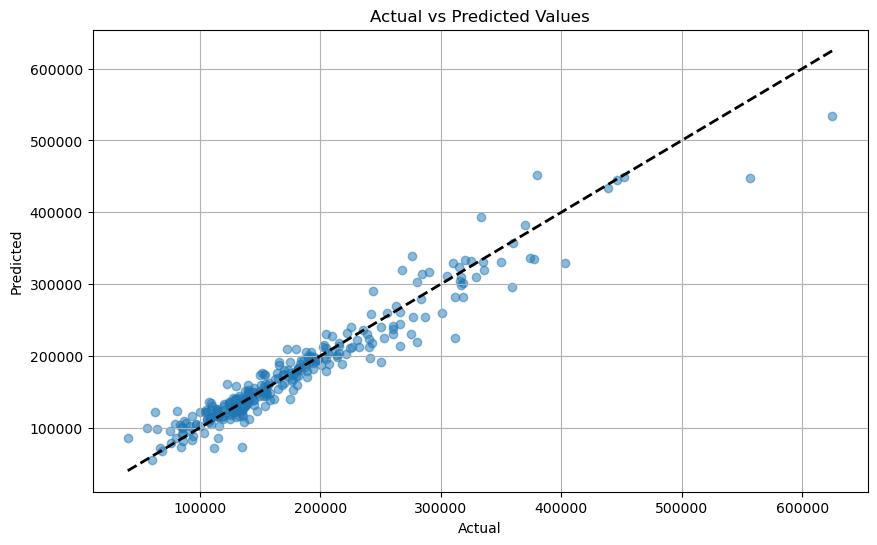

In [83]:
plot_predictions(y_test, y_pred)

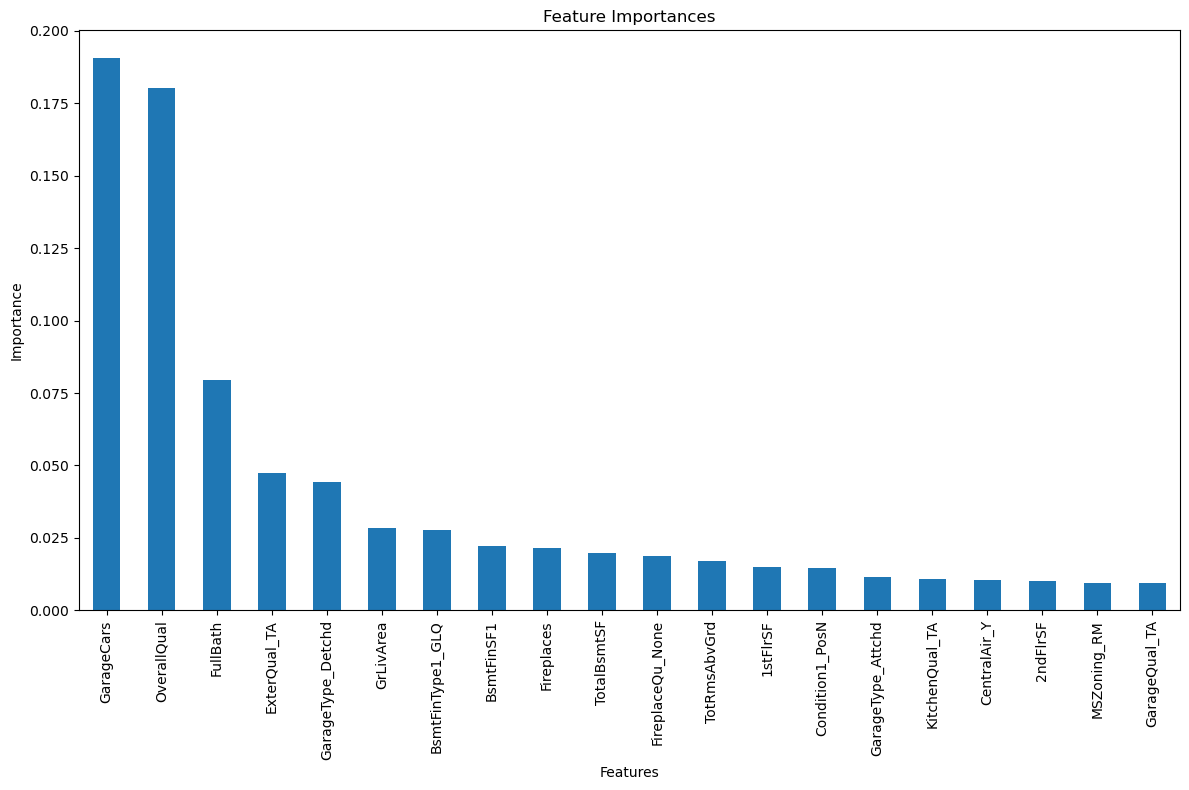

In [84]:
importances = model.feature_importances_

plot_feature_importances(importances, X_train)

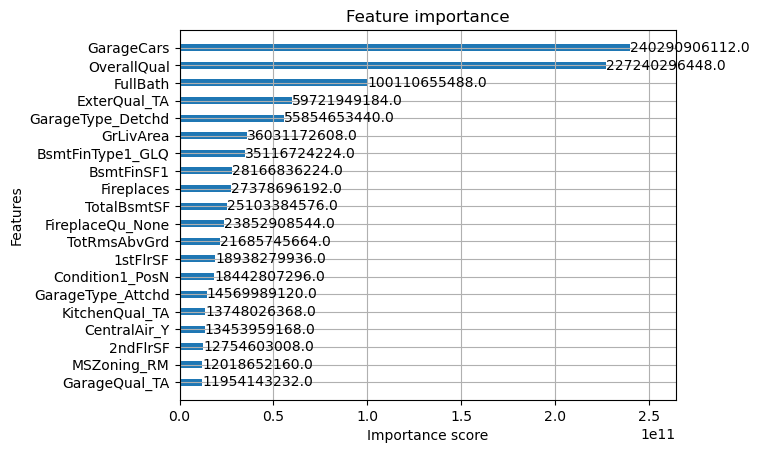

In [85]:

plot_importance(model, importance_type="gain", max_num_features=20, height=0.4)
plt.show()


In [86]:


model = GradientBoostingRegressor(
    n_estimators=100,       # nombre d’arbres
    learning_rate=0.1,      # shrinkage
    max_depth=3,            # profondeur des arbres
    subsample=1.0,          # fraction des données par arbre
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [87]:
print_metrics(y_test, y_pred)

Model Performance Metrics
MAE   : 14905.2959
RMSE  : 21971.3230
RMSLE : 0.1316
MAPE  : 0.0919
R²    : 0.9308


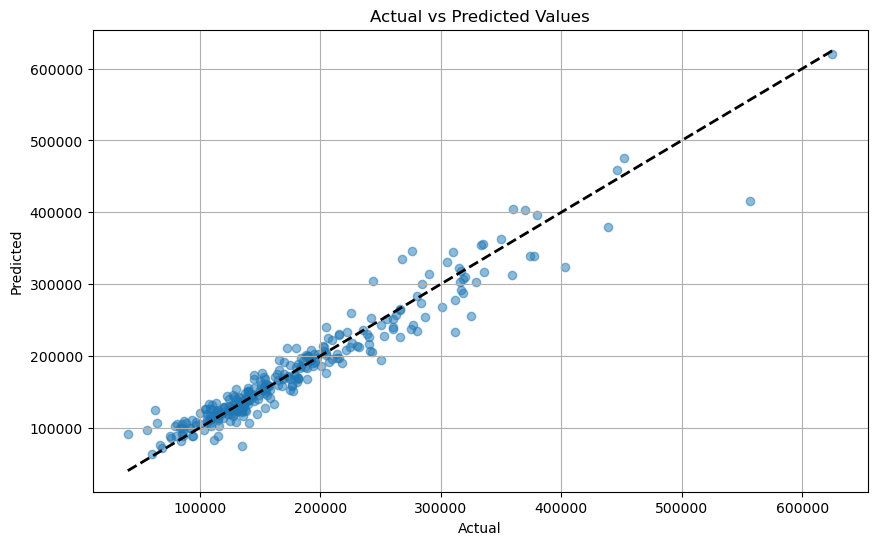

In [88]:
plot_predictions(y_test, y_pred)

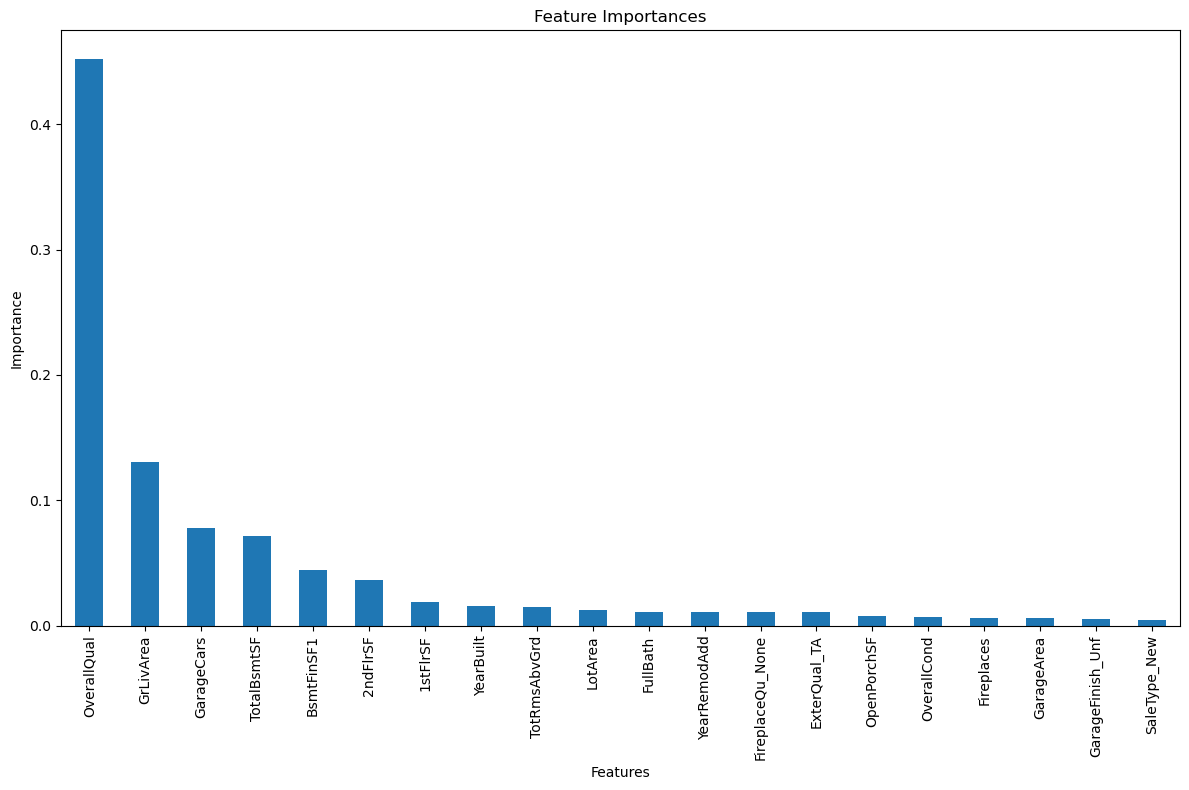

In [89]:
importances = model.feature_importances_

plot_feature_importances(importances, X_train)

In [90]:

model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train,
          eval_set=[(X_test, y_test)])
y_pred = model.predict(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3318
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 171
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 181771.767182


In [91]:
print_metrics(y_test, y_pred)

Model Performance Metrics
MAE   : 14996.6453
RMSE  : 23479.4194
RMSLE : 0.1353
MAPE  : 0.0910
R²    : 0.9210


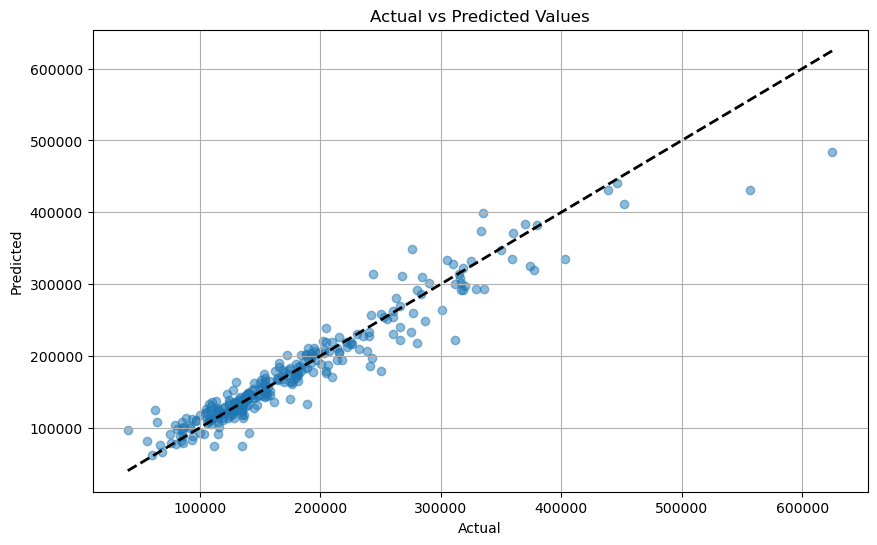

In [92]:
plot_predictions(y_test, y_pred)

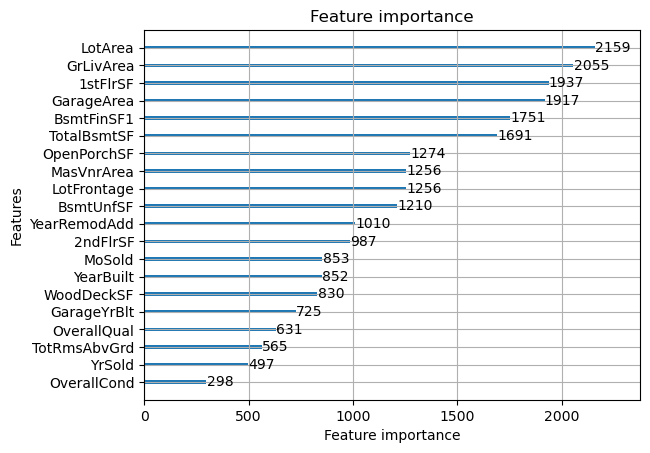

In [93]:

lgb.plot_importance(model, max_num_features=20)
plt.show()


In [94]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(["SalePrice","anomaly"], axis=1), data_train["SalePrice"], test_size=0.2, random_state=42)

In [95]:

# Spécifie les colonnes catégorielles par leur index (ou nom avec dataframe)

model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    verbose=0
)

model.fit(X_train, y_train, cat_features=X_train.select_dtypes(include=['object']).columns.tolist())
y_pred = model.predict(X_test)


In [96]:
print_metrics(y_test, model.predict(X_test))

Model Performance Metrics
MAE   : 16884.9104
RMSE  : 27608.7440
RMSLE : 0.1395
MAPE  : 0.1003
R²    : 0.9006


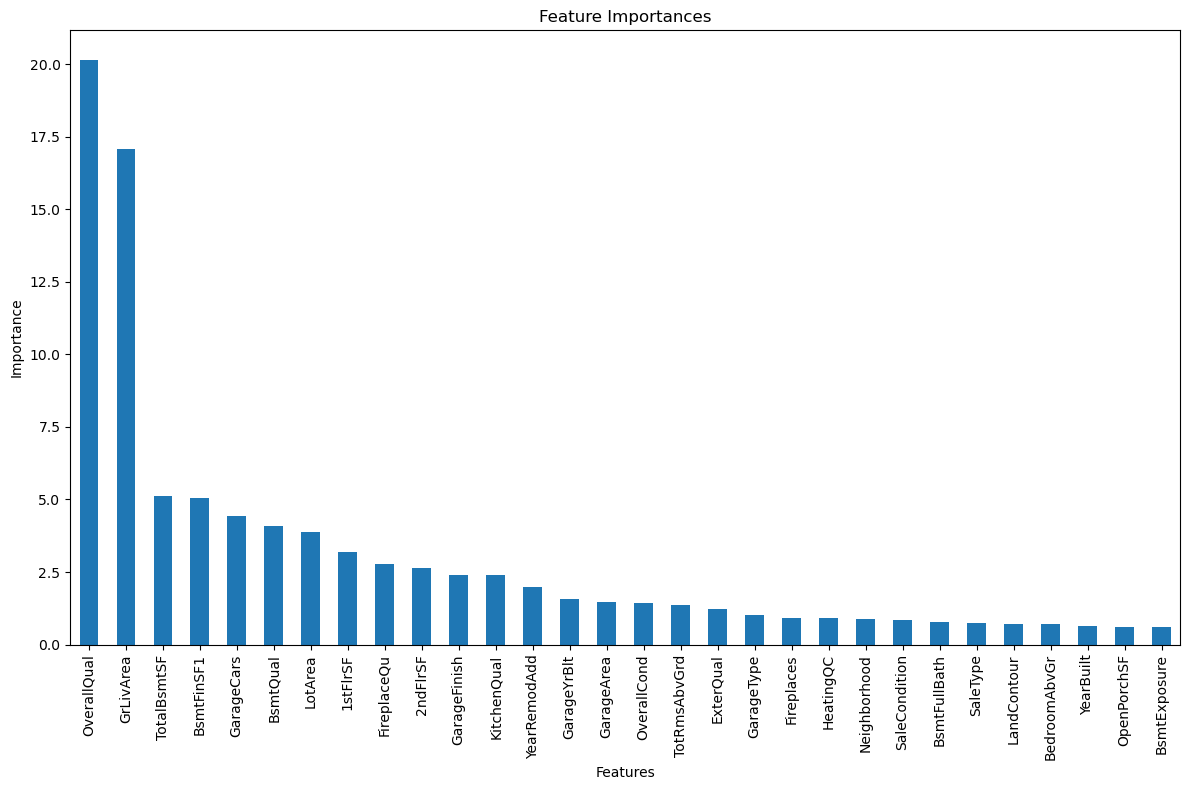

In [97]:
importances = model.feature_importances_
plot_feature_importances(importances, X_train, max_num_features=30)

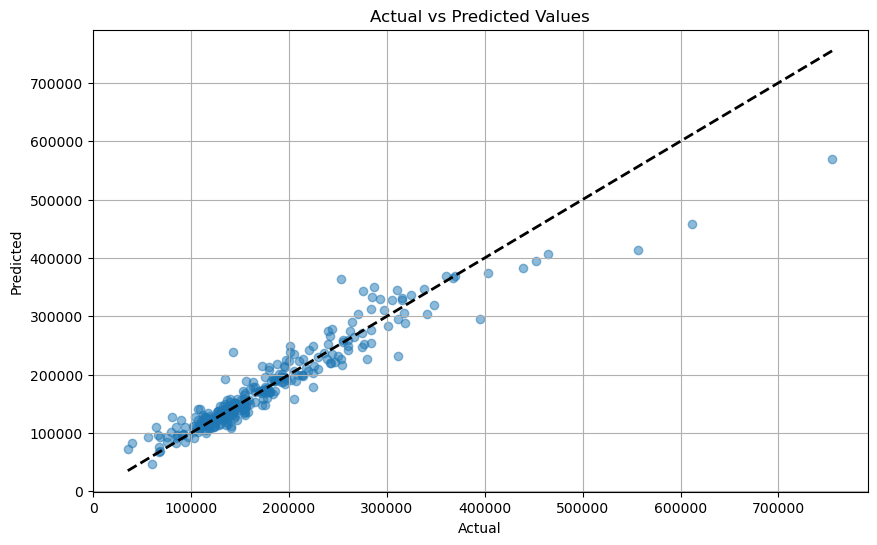

In [98]:
plot_predictions(y_test, y_pred)

In [99]:
# Chargement dataset
df = data_train.drop(columns=['anomaly'])  # Suppression de la colonne cible pour l'entraînement
target = 'SalePrice'

# Séparation train/test
train_data = df.sample(frac=0.8, random_state=42)
test_data = df.drop(train_data.index)

# Entraînement AutoGluon
predictor = TabularPredictor(label=target).fit(train_data, time_limit=300, presets='best')

# Prédictions
preds = predictor.predict(test_data)
print(preds.head())

# Évaluation
performance = predictor.evaluate(test_data)


No path specified. Models will be saved in: "AutogluonModels\ag-20250618_104317"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       5.11 GB / 15.26 GB (33.5%)
Disk Space Avail:   234.71 GB / 451.61 GB (52.0%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon 

(_ray_fit pid=21180) [1000]	valid_set's rmse: 29474.4


(_dystack pid=1040) 	-29657.6848	 = Validation score   (-root_mean_squared_error)
(_dystack pid=1040) 	4.48s	 = Training   runtime
(_dystack pid=1040) 	0.14s	 = Validation runtime
(_dystack pid=1040) Fitting model: LightGBM_BAG_L1 ... Training model for up to 32.99s of the 55.47s of remaining time.
(_dystack pid=1040) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.49%)
(_dystack pid=1040) 	-31150.3292	 = Validation score   (-root_mean_squared_error)
(_dystack pid=1040) 	4.01s	 = Training   runtime
(_dystack pid=1040) 	0.13s	 = Validation runtime
(_dystack pid=1040) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 24.11s of the 46.59s of remaining time.
(_dystack pid=1040) c:\Users\tanto\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This fu

Id
2     175841.218750
9     141748.187500
14    218197.796875
15    149565.421875
21    329069.750000
Name: SalePrice, dtype: float32


In [101]:
predictor.model_best

'WeightedEnsemble_L3'

In [102]:
importances = predictor.feature_importance(test_data)

Computing feature importance via permutation shuffling for 79 features using 292 rows with 5 shuffle sets...
	901.88s	= Expected runtime (180.38s per shuffle set)
	100.23s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [103]:
importances.head(40)

,importance,stddev,p_value,n,p99_high,p99_low
OverallQual,11930.527756,634.608090,9.570364e-07,5,13237.194584,10623.860927
GrLivArea,7865.182917,589.924474,3.769476e-06,5,9079.845562,6650.520271
Neighborhood,3633.043264,298.055471,5.387657e-06,5,4246.743598,3019.342931
TotalBsmtSF,2356.496145,361.050376,6.410812e-05,5,3099.903860,1613.088430
BsmtFinSF1,2195.070290,332.947954,6.161504e-05,5,2880.614730,1509.525851
GarageCars,1881.247084,465.113080,4.140381e-04,5,2838.921345,923.572823
1stFlrSF,1717.259528,240.624216,4.507236e-05,5,2212.708116,1221.810941
OverallCond,1705.394591,152.556591,7.603018e-06,5,2019.510721,1391.278462
2ndFlrSF,1509.527938,271.005121,1.194785e-04,5,2067.531228,951.524648
LotArea,1163.428027,207.408941,1.162385e-04,5,1590.485903,736.370150


In [104]:
# Afficher les détails sur un modèle spécifique
print(predictor.model_info('WeightedEnsemble_L2'))  # ou un autre nom de modèle


{'name': 'WeightedEnsemble_L2', 'model_type': 'WeightedEnsembleModel', 'problem_type': 'regression', 'eval_metric': 'root_mean_squared_error', 'stopping_metric': 'root_mean_squared_error', 'fit_time': 0.021771669387817383, 'num_classes': None, 'quantile_levels': None, 'predict_time': 0.0, 'val_score': -27608.517506910735, 'hyperparameters': {'use_orig_features': False, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'stratify': 'auto', 'bin': 'auto', 'n_bins': None}, 'hyperparameters_user': {'save_bag_folds': True}, 'hyperparameters_fit': {}, 'hyperparameters_nondefault': ['save_bag_folds'], 'ag_args_fit': {'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temper